In [4]:
# %load std_libraries.py
#to keep my scripts consistent, I am adding this to the top of all scripts with %load std_libraries.py
import sys
#Indicate operating environment and import core modules
location_input = input("what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = other")
location_dict = {'a': "C:\\Users\\BMH_work\\github\\expression_broad_data", 'b': "/home/heineike/github/expression_broad_data",
                 'c': "C:\\Users\\Ben\\Documents\\GitHub\\expression_broad_data", 'd':'you need to add your location to the location_dict'}
base_dir = location_dict[location_input]
print("base directory is " + base_dir)

if sys.path[-1] != base_dir:
    sys.path.append(base_dir)
    print("Added " + base_dir + " to path: " )
    print(sys.path)

import os

print("I am about to import a library")
from core import expression_plots 
from core import io_library 
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook
data_processing_dir = base_dir + os.sep + os.path.normpath("expression_data") + os.sep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.colormap as cm
from matplotlib_venn import venn2
from matplotlib_venn import venn3
#for my windows computer I had to install this package using pip rather than anaconda.  I got this error message: 
#twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
#import seaborn as sns; sns.set(style="ticks", color_codes=True)
#from sklearn import linear_model
import pickle
#import subprocess
#import networkx as nx
#import scipy.stats as stats
#import statsmodels.graphics.gofplots as stats_graph
#import scipy.cluster.hierarchy as sch

# from Bio import SeqIO
# from Bio import SeqFeature as sf
# from Bio.Alphabet import generic_dna
# from Bio.Seq import Seq

# import re

from collections import Counter
# import scipy.stats as stats
# from itertools import chain
#from itertools import product
#this only works if you are online
online_input = input("are you online? Yes/No")
if online_input == "Yes": 
    import plotly.plotly as py
    import plotly.graph_objs as pygo
    import plotly.tools as pytools
    py.sign_in('heineike02_student','9dMTMZgJMgUP0YX0P5mQ')
    #py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')
    
# for phylogenetic trees: 
# from ete3 import Tree

#for scraping internet data (e.g. ncbi)
#import requests
#from lxml import etree    #parses xml output

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = othera
base directory is C:\Users\BMH_work\github\expression_broad_data
I am about to import a library
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
are you online? Yes/NoYes


In [2]:
#Load ortholog data to add SCer common names for the KL genes.  For orthologs adds both orthologs separated by
# an _.  For some reason this takes a while
orth_dir = os.path.normpath(data_processing_dir + 'ortholog_files_YGOB') + os.sep
orth_lookup = io_library.read_orth_lookup_table('Klac', 'Scer', orth_dir)

sc_common_name_labels = {}

for kl_gene, orth_list in orth_lookup.items():
    print(kl_gene)
    sc_common_name_labels[kl_gene] = '_'.join([io_library.SC_common_name_lookup([sc_orf])[0] for sc_orf in orth_list])
    print(sc_common_name_labels[kl_gene])


KLLA0F00484g
ECM1
KLLA0E06513g
RTG3
KLLA0D17204g
TAF10
KLLA0F23012g
NONE
KLLA0F23221g
NONE
KLLA0F23331g
NONE
KLLA0F23573g
NONE
KLLA0F24486g
NONE
KLLA0D17226g
CDC37
KLLA0F24948g
NONE
KLLA0D17270g
STB3
KLLA0F27841g
NONE
KLLA0F28105g
NONE
KLLA0D17358g
SEC7
KLLA0D17424g
SUP35
KLLA0A03399g
NONE
KLLA0D17402g
ARG82
KLLA0A04389g
NONE
KLLA0F19360g
NONE
KLLA0B10219g
NONE
KLLA0D18029g
HMO1
KLLA0C00572g
PRD1
KLLA0E01035g
NONE
KLLA0C19019g
NONE
KLLA0C18700g
NONE
KLLA0F00264g
NONE
KLLA0C03201g
YJL206C
KLLA0D18051g
RSM24
KLLA0D18073g
NGG1
KLLA0E14015g
NONE
KLLA0C17336g
NONE
KLLA0C18656g
UBC1
KLLA0E06535g
SFT2
KLLA0D18117g
SDH4_SHH4
KLLA0E09329g
YOR020W-A
KLLA0D03432g
SNQ2
KLLA0D18139g
CSN9
KLLA0D18161g
NVJ3
KLLA0F18766g
YDR034W-B_YBR056W-A
KLLA0D18194g
SCC2
KLLA0D18216g
SAS4
KLLA0D18238g
CDC1
KLLA0D18282g
PLP1
KLLA0D18326g
ATC1
KLLA0C16511g
YOR012W
KLLA0D18348g
UPS3_UPS2
KLLA0A12045g
NONE
KLLA0D18392g
YDR186C
KLLA0E06557g
ECM21_CSR2
KLLA0D18458g
CCT6
KLLA0D18480g
SLY1
KLLA0D18502g
RVB1
KLLA0D18535g
H

MIT1
KLLA0D14036g
YEA6_YIA6
KLLA0D13948g
VAB2
KLLA0A03333g
ACS1
KLLA0E20153g
YBL059W_AIM11
KLLA0D13926g
YEA4
KLLA0D13904g
GIM4
KLLA0D13882g
WBP1
KLLA0D13816g
IRC22
KLLA0D13750g
NOP16
KLLA0D13728g
PMI40
KLLA0D13684g
FMP52
KLLA0D13662g
YND1
KLLA0D13618g
NUG1
KLLA0E20043g
SHP1
KLLA0D13596g
PAC2
KLLA0D13574g
TMA20
KLLA0D13530g
SEC3
KLLA0D13508g
NTF2
KLLA0D13442g
YER010C
KLLA0B11660g
PRE1
KLLA0B11638g
PRP22
KLLA0B13794g
MNN4_YJR061W
KLLA0B11616g
HEM14
KLLA0E20021g
PTH2
KLLA0B11572g
FAA2
KLLA0B11550g
BIM1
KLLA0F13706g
YTA12
KLLA0C02079g
SPC25
KLLA0F17776g
NONE
KLLA0C02057g
ISC1
KLLA0E19823g
SBH2_SBH1
KLLA0D10956g
GPA2
KLLA0D10824g
RPN3
KLLA0A11748g
ANS1
KLLA0D10802g
SRB4
KLLA0D10736g
PRO3
KLLA0E19977g
PTC3_PTC2
KLLA0D10637g
YAT2
KLLA0D10571g
GCD11
KLLA0F09955g
CHO1
KLLA0B00583g
GAL83_SIP2
KLLA0B11055g
NONE
Klac_YGOB_Anc_3.518
MIG3_MIG2
KLLA0B00627g
SMB1
KLLA0B00649g
CHZ1
KLLA0B00671g
YPT31_YPT32
KLLA0B00693g
FIR1
KLLA0B00715g
ZRG8
KLLA0F03179g
Scer_YGOB_Anc_7.495
KLLA0E19955g
YBL055C
KLLA0A0

SUT1_SUT2
KLLA0A03113g
YIP5
KLLA0F23034g
AIM14
KLLA0F22968g
YGL159W
KLLA0F12188g
RCK1_RCK2
KLLA0E10451g
RFT1
KLLA0E08889g
CDC43
KLLA0E08933g
LYS5
KLLA0E08955g
PEX14
KLLA0E08977g
NUT1
KLLA0E08999g
INO80
KLLA0E09065g
ARO2
KLLA0E10473g
APN2
KLLA0E09241g
RRT6
KLLA0E14851g
TIP20
KLLA0E14807g
MRF1
KLLA0E14719g
GPI10
KLLA0E14697g
HUL5
KLLA0C02497g
YGL140C
KLLA0B01914g
FLC3_FLC1
KLLA0B01936g
YGL138C
KLLA0B01958g
SEC27
KLLA0B01980g
MRM2
KLLA0A03465g
GEM1
KLLA0E10495g
POP8
KLLA0B02002g
RPL1B_RPL1A
KLLA0B02024g
PCL10_PCL8
KLLA0B02090g
ITC1_YPL216W
KLLA0B02178g
SNT2
KLLA0B02200g
CEG1
KLLA0B02222g
RSM23
KLLA0C02541g
CWC23
KLLA0C05786g
SOH1
KLLA0F09526g
SCS3
KLLA0F09647g
MET13
KLLA0E10517g
PEP1
KLLA0F09768g
MON1
KLLA0F09812g
RPS2
KLLA0F09845g
NAB2
KLLA0B00561g
PRP43
KLLA0B00539g
COQ8_YBR230W-A
KLLA0B00495g
YGL117W
KLLA0F10791g
CDC20
KLLA0F10769g
SNF4
KLLA0F10747g
YGL114W
KLLA0E10539g
FUS3
KLLA0F10681g
SLD3
KLLA0F10659g
TAF6
KLLA0F10593g
NSA1
KLLA0F10571g
CUE3
KLLA0F10483g
YGL108C
KLLA0F10439g
MLC1
K

SNF6
KLLA0F18216g
RIM4
KLLA0F18238g
NPR3
KLLA0D14575g
SPO11
KLLA0D14553g
AIM17
KLLA0F24552g
ETR1
KLLA0F25388g
OPI1
KLLA0F25432g
APM2
KLLA0F25454g
YHL018W
KLLA0F25498g
YHL017W_PTM1
KLLA0C17468g
DUR3
KLLA0F25542g
RPS20
KLLA0F25564g
YLF2
KLLA0F25586g
OTU2
KLLA0F25652g
YHL012W_UGP1
KLLA0F25718g
PRS3
KLLA0F24618g
YPK3
KLLA0F25740g
ETP1
KLLA0B13695g
YAP3
KLLA0F25784g
YHL008C
KLLA0B13607g
STE20
KLLA0B13541g
SHU1
KLLA0B13519g
MRP4
KLLA0B13497g
LAG1_LAC1
KLLA0B13475g
HSE1
KLLA0B13409g
RPL14B_RPL14A
KLLA0A02827g
OSH7_OSH6
KLLA0F24640g
CDS1
KLLA0E13839g
QCR10
KLLA0E18701g
LEU5
KLLA0E18679g
TCD1_TCD2
KLLA0E18613g
NEM1
KLLA0F25916g
GPA1
KLLA0F25872g
TIM10
KLLA0E03653g
ERG11
KLLA0E03609g
SOD2
KLLA0E03565g
TDA3
KLLA0E03433g
DIA4
KLLA0B07161g
RKM3
KLLA0E03411g
VPS29
KLLA0E03367g
ARD1
KLLA0E03323g
SPO13
KLLA0A08382g
YSC83
KLLA0A08404g
ARG4
KLLA0A08426g
DED81
KLLA0A08448g
YHR020W
KLLA0E11661g
RPS27B_RPS27A
KLLA0E11639g
YHR022C
KLLA0B07139g
RPL4A_RPL4B
KLLA0E11595g
MYO1
KLLA0E11573g
MAS2
KLLA0E11551g
THR

ASG7
KLLA0A06600g
SET2
KLLA0A06732g
ERG20
KLLA0A06754g
QCR8
KLLA0A06820g
HAL5_KKQ8
KLLA0B07205g
TPK1_TPK3
KLLA0B07227g
YJL163C
KLLA0B07271g
JJJ2
KLLA0B07337g
FMP33
KLLA0B07370g
PIR5_PIR1
KLLA0B07392g
HSP150_PIR3
KLLA0F11638g
SLM4
KLLA0B07447g
CIS3
KLLA0B07469g
FAR1
KLLA0B07491g
SSY5
KLLA0B07513g
FBP26
KLLA0B07535g
VPS35
KLLA0D16412g
INO1
KLLA0A06061g
DAS1
KLLA0A05973g
RPA34
KLLA0A05929g
MRX5
KLLA0A05907g
IDS2
KLLA0C14454g
ECM33_PST1
KLLA0A05885g
SFH5
KLLA0A05841g
TIM17
KLLA0A05819g
YAK1
KLLA0A05797g
RPB4
KLLA0A05775g
YUR1_KTR2
KLLA0A05731g
TIF2_TIF1
KLLA0A05709g
GLG2_GLG1
KLLA0A05700g
RPS21B_RPS21A
Klac_YGOB_Anc_1.217
LCB3_YSR3
KLLA0C14498g
RPG1
KLLA0E15445g
MRS3_MRS4
KLLA0E15401g
YJL132W
KLLA0E15379g
AIM23
KLLA0E15357g
URA2
KLLA0E15335g
TRK1_TRK2
KLLA0E15313g
PBS2
KLLA0F11440g
NONE
KLLA0E15247g
NIT2
KLLA0E15225g
GCD14
KLLA0E15159g
LSM1
KLLA0C13123g
CYC3
KLLA0C14520g
SEC18
KLLA0E15115g
MTC1
KLLA0E15093g
ALB1
KLLA0E15071g
RPE1
KLLA0E14983g
PHO86
KLLA0E14939g
NCA3_UTH1
KLLA0E14895g
ASF1


NFU1
KLLA0F25674g
TUL1
KLLA0F25696g
YKL033W-A
KLLA0F25762g
TTI1
KLLA0F23265g
FUN12
KLLA0B08888g
MRPL36
KLLA0E18635g
MAE1
KLLA0E18657g
TFA1
KLLA0E08097g
PAN3
KLLA0E08053g
URA6
KLLA0C06842g
RRP36
KLLA0E08009g
CDC16
KLLA0E07965g
MAK11
KLLA0E17975g
RAM2
KLLA0B08866g
TFC1
KLLA0E18041g
YKL018C-A
KLLA0E18063g
SWD2
KLLA0E18085g
HCS1
KLLA0E18107g
ATP7
KLLA0E18129g
PUT3
KLLA0E18151g
URB1
KLLA0E18217g
ARC19
KLLA0E18239g
PRP40
KLLA0B13585g
UFD4
KLLA0B13563g
MRT4
KLLA0B08844g
PTC4
KLLA0B13453g
CAP1
KLLA0B13431g
SFT1
KLLA0B13387g
AUR1
KLLA0B13365g
MRP17
KLLA0B13343g
DID4
KLLA0B13321g
MET14
KLLA0B13277g
VPS1
KLLA0B13255g
PAP1
KLLA0A02849g
ECM9
KLLA0B08822g
TPS1
KLLA0A02871g
YKR005C
KLLA0A02915g
MRPL13
KLLA0A02937g
MEH1
KLLA0A02959g
RSC4
KLLA0E13817g
FOX2
KLLA0C09372g
YKR011C
KLLA0D02376g
YPT52
KLLA0D02310g
MIC60
KLLA0D02266g
HEL1
KLLA0D09152g
VMA2
KLLA0D02200g
VPS51
KLLA0F14344g
NTR2
KLLA0F13882g
YKR023W
KLLA0F13926g
DBP7
KLLA0F13948g
RPC37
KLLA0F13970g
GCN3
KLLA0F21230g
GMH1
KLLA0F21274g
SPO14
KLLA0

PSY3
KLLA0E01211g
FBP1
KLLA0E01145g
SEC61
KLLA0E05369g
CSR1
KLLA0E05347g
CTF3
KLLA0E05325g
NAM2
KLLA0E05303g
SMC6
KLLA0E05237g
IKI3
KLLA0E24597g
SSE2_SSE1
KLLA0E05215g
SWC7
KLLA0E05193g
VAC14
KLLA0E05171g
REH1
KLLA0E05105g
STE23
KLLA0E05083g
ECM19
KLLA0E04995g
CCW14
KLLA0E04973g
ATP10
KLLA0B03333g
CST9
KLLA0B03311g
COX8
KLLA0E24575g
NPL4
KLLA0B03267g
VPS33
KLLA0B03234g
AFG2
KLLA0B03179g
SKI2
KLLA0B03069g
DUS3
KLLA0B03047g
SFP1
KLLA0B03025g
SEI1
KLLA0B02959g
DUS4
KLLA0B02893g
YLR407W
KLLA0B02871g
BLS1
KLLA0E24553g
SEC66
KLLA0B02827g
UTP21
KLLA0B02805g
VIP1
KLLA0B02739g
BER1
KLLA0B02585g
PUN1
KLLA0B02541g
VPS36
KLLA0D03036g
CDC73
KLLA0D03058g
YLR419W
KLLA0D02926g
URA4
KLLA0E24531g
SMY2_SYH1
KLLA0D02882g
RPN13
KLLA0D02860g
DCK1
KLLA0D02750g
ATG17
KLLA0D02728g
SPP382
KLLA0D02618g
TUS1
KLLA0D02552g
MAG2
KLLA0D02530g
CRN1
KLLA0B05555g
SEN1
KLLA0B05533g
ATG23
KLLA0E24509g
UMP1
KLLA0B05489g
CNA1_CMP2
KLLA0B05467g
TSR2
KLLA0B05445g
ECM30
KLLA0B05423g
DIF1_SML1
KLLA0B05247g
CAR2
KLLA0B05203g
LSM

PRP24
KLLA0C05588g
SDS24_SDS23
KLLA0D01980g
TMA23
KLLA0D01947g
RRN9
KLLA0D01639g
SCS7
KLLA0D01705g
RCE1
KLLA0D01859g
DSK2
KLLA0D01595g
FCP1
KLLA0D01573g
PRM15
KLLA0D01452g
CAT8
KLLA0D01430g
GPI12
KLLA0D01408g
AEP2
KLLA0C05676g
HPC2
KLLA0D01386g
RIT1
KLLA0C06226g
YKU70
KLLA0C06270g
MRPL33
KLLA0C06314g
DSS1
KLLA0A09537g
HSH155
KLLA0A09603g
ABZ2
KLLA0A09669g
HAS1
KLLA0A09713g
TDA1
KLLA0A09801g
GOT1
KLLA0A09845g
HER2
KLLA0C05698g
YBP1_YBP2
KLLA0A09867g
JNM1
KLLA0A09955g
LCB1
KLLA0A09977g
PRC1
KLLA0A09999g
LIP1
KLLA0A10087g
DYN3
KLLA0A10109g
ADE4
KLLA0A10131g
ATM1
KLLA0C13948g
YME2
Klac_YGOB_Anc_5.18b
UBP15
KLLA0C05720g
ATG12
KLLA0C14069g
FKS3
KLLA0C14113g
GAS1
KLLA0C14157g
PSE1
KLLA0F03014g
NIP1
KLLA0F03080g
GLC8
KLLA0A10197g
ELP6
KLLA0A10175g
TGL3
KLLA0A10153g
PRE5
KLLA0C18887g
YMR315W
KLLA0A03960g
SAW1
KLLA0C05764g
PYC2_PYC1
KLLA0E14499g
FET4
KLLA0F09581g
YBR220C
KLLA0E01981g
RPD3
KLLA0E02003g
PEX6
KLLA0E02025g
MDJ2
KLLA0E02047g
EGT2
KLLA0E02069g
PFA3
KLLA0E02113g
FIG4
KLLA0F09603g
PDB1


NUF2
KLLA0F14685g
RTG1
KLLA0F24772g
INP54
KLLA0F24728g
MET22
KLLA0C03806g
CRT10
KLLA0F02079g
MIC12
KLLA0C03894g
APM4
KLLA0C03916g
PRS5
KLLA0C03960g
MAM3
KLLA0C04037g
ARG1
KLLA0C04059g
YOL057W
KLLA0B13926g
THI20
KLLA0B08679g
PSH1
KLLA0B08734g
AIM39
KLLA0C14410g
SPE2
KLLA0F01210g
SHM1
KLLA0F07579g
GAL11
KLLA0F07557g
GSH2
KLLA0F07667g
PEX15
KLLA0F07733g
NGL1
KLLA0F07799g
NOP12
KLLA0F07843g
RPS15
KLLA0F07865g
RPP2A
KLLA0B11858g
YOL036W_YIR016W
KLLA0F07997g
SMC5
KLLA0F07975g
MSE1
KLLA0F07953g
OPI10
KLLA0F07931g
SIL1
KLLA0D14421g
GAS5
KLLA0B11748g
MDM38
KLLA0B11814g
MIM1
KLLA0A10989g
LAG2
KLLA0F01749g
TSC10
KLLA0A10923g
IFM1
KLLA0A10901g
TSR4
KLLA0A10835g
DIS3
KLLA0A10813g
TAT2
KLLA0A10681g
TLG2
KLLA0C05874g
HRD1
KLLA0C05918g
HTZ1
KLLA0F01727g
REI1
KLLA0C05984g
RCL1
KLLA0C06028g
MDM12
KLLA0C06050g
COQ10
KLLA0C06116g
TOP1
KLLA0C06160g
RPB11
KLLA0C06182g
SIN3
KLLA0C06204g
PFA4
KLLA0D01331g
IZH2
KLLA0D01287g
PHO80
KLLA0F01683g
MRPL37
KLLA0D01309g
RRP6
KLLA0D01221g
ALG6
KLLA0D01023g
UTP23
KLLA0D

RNY1
KLLA0F01056g
TFB2
KLLA0F01100g
MEI5
KLLA0F01166g
VPS30
KLLA0F00990g
MRP51
KLLA0F00924g
IDI1
KLLA0F00858g
HOS3
KLLA0F00814g
BEM3
KLLA0F00726g
PEX25_PEX27
KLLA0F00704g
CAR1
KLLA0F00660g
GDE1
KLLA0E24795g
YPL109C
KLLA0E24685g
YPL108W
KLLA0E24619g
YPL107W
KLLA0F07601g
RRT8
KLLA0C00550g
MIC10
KLLA0E24465g
MSD1
KLLA0E24377g
FMP30
KLLA0E24355g
ELP4
KLLA0E24333g
ATG21
KLLA0E24311g
INA17
KLLA0E24289g
MGR2
KLLA0E24267g
MSY1
KLLA0E24223g
PNG1
KLLA0E24157g
SEC62
KLLA0E24135g
NOG1
KLLA0B12397g
OCT1
KLLA0E24091g
SSU1
KLLA0E24069g
GLR1
KLLA0E23937g
ELP3
KLLA0E23915g
SEC16
KLLA0E23871g
BRO1
KLLA0E23849g
SEN54
KLLA0E23717g
MOT1
KLLA0E23563g
ATP4
KLLA0E23475g
GPI2
KLLA0E23431g
GCR1
KLLA0E23409g
YTA6
KLLA0E23387g
UBP16
KLLA0E23343g
YPL071C
KLLA0E23321g
MUK1
KLLA0E23299g
BTS1
KLLA0E23233g
YPL067C
KLLA0E23145g
RGL1
KLLA0E23123g
VPS28
KLLA0C00693g
KAR4
KLLA0E23101g
TIM50
KLLA0E23057g
ALD6
KLLA0F28017g
MFM1
KLLA0B09636g
GRX5
KLLA0B09702g
PDR12
KLLA0B09834g
LGE1
KLLA0B09878g
LEE1
Klac_YGOB_OAZ1
OAZ1
KLLA

NONE
KLLA0F05962g
BUD23
KLLA0C17050g
NONE
KLLA0E13597g
MPT5
KLLA0A04906g
NONE
KLLA0C09152g
ARE1_ARE2
KLLA0D11000g
NONE
KLLA0E04357g
NONE
KLLA0C10230g
NONE
KLLA0E09923g
NONE
KLLA0C09108g
YCR051W
KLLA0E03477g
NONE
KLLA0B00759g
NONE
KLLA0C09042g
RSC6_SNF12
KLLA0A01870g
NONE
KLLA0E03719g
NONE
KLLA0C09020g
THR4
KLLA0C08998g
CTR86
KLLA0F08107g
FUN14
KLLA0C08976g
PWP2
KLLA0B09922g
NONE
KLLA0C08932g
YIH1
KLLA0C08910g
TAH1
KLLA0D06281g
NONE
KLLA0C19041g
NONE
KLLA0E24003g
NONE
KLLA0C08866g
YCR061W
KLLA0E12959g
NONE
KLLA0E00419g
NONE
KLLA0C08800g
BUD31
KLLA0E05655g
NONE
KLLA0E05589g
NONE
KLLA0C08778g
HCM1
KLLA0A06996g
NONE
KLLA0F21560g
NONE
KLLA0C08756g
RAD18
KLLA0F21714g
NONE
KLLA0E16985g
NONE
KLLA0D13068g
NONE
KLLA0D15103g
NONE
KLLA0C08723g
SED4_SEC12
KLLA0F18084g
NONE
KLLA0D13706g
NONE
KLLA0C08679g
ATG15
KLLA0B11363g
NONE
KLLA0E04005g
NONE
KLLA0C08635g
CPR4_CPR8
KLLA0E02641g
NONE
KLLA0C08569g
IMG2
KLLA0A07777g
NONE
KLLA0C08547g
RSA4
KLLA0F03146g
NONE
KLLA0C08525g
SSK22_SSK2
KLLA0C08415g
SOL2_S

RPT2
KLLA0F14729g
PTC1
KLLA0F14751g
MED2
KLLA0F14773g
ATP16
KLLA0F14795g
MCD1
KLLA0E17403g
NHP10
KLLA0E17381g
RMD1
KLLA0E17227g
YRB1
KLLA0E17513g
RAD57
KLLA0D01243g
NONE
KLLA0E17535g
MAF1
KLLA0E17579g
SOK1
KLLA0E17645g
TRP1
KLLA0D03476g
NONE
KLLA0B07095g
PSF1
KLLA0B07084g
RAD61
KLLA0B06974g
DAD1
KLLA0B06952g
KCS1
KLLA0B06754g
GCV1
KLLA0B06710g
DAS2
KLLA0A10659g
FAL1
KLLA0A10637g
ATG31
KLLA0A10593g
SES1
KLLA0F04367g
VPS54
KLLA0F04345g
REG1_REG2
KLLA0F04213g
LYS14
KLLA0F18744g
ARO3
KLLA0F18678g
EHD3
KLLA0F18392g
KRS1
KLLA0F20658g
ENA1
KLLA0F18436g
RSM10
KLLA0F18546g
HEM13
KLLA0F18568g
RPC11
KLLA0F11770g
HEM12
KLLA0F11792g
VMS1
KLLA0F18832g
TPI1
KLLA0F18810g
DET1
KLLA0F11660g
DBF4
KLLA0D09196g
CDC34
KLLA0E12629g
EMC10
KLLA0E12607g
YOS9
KLLA0F00528g
BDH2
KLLA0C02739g
TGL2
KLLA0E12519g
MAK21
KLLA0D02156g
YDR061W
KLLA0D02134g
LCB2
KLLA0F18062g
AIM7
KLLA0F18040g
RPS13
KLLA0F12694g
RRG1
KLLA0F12672g
RTR2_RTR1
KLLA0A00110g
NONE
KLLA0A00132g
NONE
KLLA0A00154g
NONE
KLLA0A00176g
NONE
KLLA0A00220g


Scer_11.trna14D_Scer_10.trna4D
Klac_6.trna24R
NONE
Klac_6.trna25P
NONE
Klac_1.trna8K
NONE
Klac_1.trna7R
Scer_7.trna30R_Scer_7.trna11R
Klac_2.trna26V
Scer_13.trna12V
Klac_2.trna19A
Scer_15.trna18A
Klac_2.trna18T
NONE
Klac_6.trna14G
Scer_10.trna13G_Scer_7.trna31G
Klac_5.trna6I
Scer_9.trna2I_Scer_14.trna11I
Klac_6.trna5P
Scer_15.trna8P
Klac_6.trna20V
Scer_12.trna11V_Scer_15.trna16V
Klac_4.trna10L
Scer_12.trna12L
Klac_1.trna10R
Scer_10.trna21R
Klac_2.trna23E
Scer_16.trna2E_Scer_7.trna9E
Klac_5.trna10N
Scer_3.trna4N_Scer_14.trna13N
Klac_1.trna19V
Scer_4.trna6V_Scer_2.trna7V
Klac_1.trna13A
Scer_6.trna8A_Scer_8.trna6A
Klac_4.trna13D
NONE
Klac_1.trna14R
NONE
Klac_4.trna12S
Scer_6.trna7S_Scer_15.trna5S
Klac_4.trna35Q
Scer_4.trna14Q_Scer_12.trna6Q
Klac_5.trna18S
Scer_5.trna2S_Scer_10.trna19S
Klac_6.trna11P
Scer_3.trna3P_Scer_14.trna12P
Klac_4.trna33G
NONE
Klac_2.trna25E
Scer_9.trna10E_Scer_5.trna7E
Klac_6.trna34W
Scer_11.trna8W_Scer_13.trna11W
Klac_6.trna29G
Scer_6.trna6G
Klac_1.trna21G
Scer_15.

In [7]:
pickle.dump(sc_common_name_labels, open(os.path.normpath(data_processing_dir + 'ortholog_files_YGOB/kl_dict_sc_common_name.pkl'),'wb'))

In [3]:
sc_common_name_labels

{'KLLA0F00484g': 'ECM1',
 'KLLA0E06513g': 'RTG3',
 'KLLA0D17204g': 'TAF10',
 'KLLA0F23012g': 'NONE',
 'KLLA0F23221g': 'NONE',
 'KLLA0F23331g': 'NONE',
 'KLLA0F23573g': 'NONE',
 'KLLA0F24486g': 'NONE',
 'KLLA0D17226g': 'CDC37',
 'KLLA0F24948g': 'NONE',
 'KLLA0D17270g': 'STB3',
 'KLLA0F27841g': 'NONE',
 'KLLA0F28105g': 'NONE',
 'KLLA0D17358g': 'SEC7',
 'KLLA0D17424g': 'SUP35',
 'KLLA0A03399g': 'NONE',
 'KLLA0D17402g': 'ARG82',
 'KLLA0A04389g': 'NONE',
 'KLLA0F19360g': 'NONE',
 'KLLA0B10219g': 'NONE',
 'KLLA0D18029g': 'HMO1',
 'KLLA0C00572g': 'PRD1',
 'KLLA0E01035g': 'NONE',
 'KLLA0C19019g': 'NONE',
 'KLLA0C18700g': 'NONE',
 'KLLA0F00264g': 'NONE',
 'KLLA0C03201g': 'YJL206C',
 'KLLA0D18051g': 'RSM24',
 'KLLA0D18073g': 'NGG1',
 'KLLA0E14015g': 'NONE',
 'KLLA0C17336g': 'NONE',
 'KLLA0C18656g': 'UBC1',
 'KLLA0E06535g': 'SFT2',
 'KLLA0D18117g': 'SDH4_SHH4',
 'KLLA0E09329g': 'YOR020W-A',
 'KLLA0D03432g': 'SNQ2',
 'KLLA0D18139g': 'CSN9',
 'KLLA0D18161g': 'NVJ3',
 'KLLA0F18766g': 'YDR034W-B_YBR0

In [34]:
#Load DEseq data for K.Lac Rph1/Gis1 delete experiment

spec = 'KL'

r1g1_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_AS_wtVr1g1_' + spec + '.csv'), index_col=0)

r1g1_deseq['kl_genename'] = io_library.kl_genename_convert_list(list(r1g1_deseq.index))
r1g1_deseq.set_index('kl_genename', inplace=True)

sc_common_name_label_list = []
for kl_gene in r1g1_deseq.index:
    try: 
        sc_common_name_label = sc_common_name_labels[kl_gene]
        if sc_common_name_label == 'NONE':
            sc_common_name_label = kl_gene
        
    except KeyError:
        sc_common_name_label = kl_gene
    sc_common_name_label_list.append(sc_common_name_label)

r1g1_deseq['SC_common_name'] = sc_common_name_label_list


#Load DEseq data for SCer Msn24/drug interaction contrast
m24_nmpp1_int_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_' + spec +  '_AS_m24del_nmpp1_interaction.csv'), index_col=0)

m24_nmpp1_int_deseq['kl_genename'] = io_library.kl_genename_convert_list(list(m24_nmpp1_int_deseq.index))
m24_nmpp1_int_deseq.set_index('kl_genename', inplace=True)

#Add column for common names
sc_common_name_label_list = []
for kl_gene in m24_nmpp1_int_deseq.index:
    try: 
        sc_common_name_label = sc_common_name_labels[kl_gene]
        if sc_common_name_label == 'NONE':
            sc_common_name_label = kl_gene
        
    except KeyError:
        sc_common_name_label = kl_gene
    sc_common_name_label_list.append(sc_common_name_label)

m24_nmpp1_int_deseq['SC_common_name'] = sc_common_name_label_list

#Load DEseq data for SCer Msn2/4 delete in WT experiment

m24_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_AS_wtVm24_' + spec + '.csv'), index_col=0)
m24_deseq['kl_genename'] = io_library.kl_genename_convert_list(list(m24_deseq.index))
m24_deseq.set_index('kl_genename', inplace=True)


#Add column for common names
sc_common_name_label_list = []
for kl_gene in m24_deseq.index:
    try: 
        sc_common_name_label = sc_common_name_labels[kl_gene]
        if sc_common_name_label == 'NONE':
            sc_common_name_label = kl_gene
        
    except KeyError:
        sc_common_name_label = kl_gene
    sc_common_name_label_list.append(sc_common_name_label)

m24_deseq['SC_common_name'] = sc_common_name_label_list



In [29]:
#Plot Deseq LFC v.s. pValue

#Plot raw expression for various gene sets

# hover_text = []
# for ind, row in kl_sc_PKA_data.iterrows():
#     hover_text.append(('{SC_common_name}<br>kl cont: {klmin:.2f}<br>kl nmpp1: {klnmpp1:.2f}').format(
#                               SC_common_name=row['SC_common_name'],
#                               klmin = row['rlog_AS_noNMPP1_YPD_t40_mean_KL'],
#                               klnmpp1 = row['rlog_AS_yesNMPP1_YPD_t40_mean_KL']
#                               ))

# kl_sc_PKA_data['hover'] = hover_text

# cmap = cm.get_cmap('tab10')

data = []

trace = pygo.Scatter(
            x = r1g1_deseq['log2FoldChange'], 
            y =  -np.log10(r1g1_deseq['pvalue']),
            text = r1g1_deseq['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = 'WT VS Rph1/Gis1 del'
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'LFC'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'-log10(padj)'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='RNAseq2018_KL_WT_VS_R1G1')




In [4]:
#To Call Rph1/Gis1 repressed genes make a line from (1.5, 3) to (3.0, 0) and a hard cutoff below of 0.5

x1,y1 = (1.5,3.0)
x2,y2 = (3.0,0.0)
ymin = 0.5

x = r1g1_deseq['log2FoldChange']
y =  -np.log10(r1g1_deseq['pvalue'])

r1g1_rep_genes = r1g1_deseq[(y > y2- (y2-y1)/(x2-x1)*(x2-x)) & (y>ymin)]

In [35]:
#Plot Msn24/nmpp1 interaction LFC v.s. pValue


data = []

trace = pygo.Scatter(
            x = m24_nmpp1_int_deseq['log2FoldChange'], 
            y =  -np.log10(m24_nmpp1_int_deseq['pvalue']),
            text = m24_nmpp1_int_deseq['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = 'Msn24 drug interaction term'
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'LFC'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'-log10(padj)'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='RNAseq2018_Msn24_drug_interaction')


In [5]:
#To Call Msn2/4 PKA interaction genes make a line from (-4.5, 0) to (-1.9, 7.5) and a hard cutoff for -log10p value of above 1.0

x1,y1 = (-4.5,0.0)
x2,y2 = (-1.9,7.5)
ymin = 1.0

x = m24_nmpp1_int_deseq['log2FoldChange']
y =  -np.log10(m24_nmpp1_int_deseq['pvalue'])

m24_nmpp1_act_genes = m24_nmpp1_int_deseq[(y > y2- (y2-y1)/(x2-x1)*(x2-x)) & (y>ymin)]

In [36]:
#Plot Deseq LFC v.s. pValue

#Plot raw expression for various gene sets

# hover_text = []
# for ind, row in kl_sc_PKA_data.iterrows():
#     hover_text.append(('{SC_common_name}<br>kl cont: {klmin:.2f}<br>kl nmpp1: {klnmpp1:.2f}').format(
#                               SC_common_name=row['SC_common_name'],
#                               klmin = row['rlog_AS_noNMPP1_YPD_t40_mean_KL'],
#                               klnmpp1 = row['rlog_AS_yesNMPP1_YPD_t40_mean_KL']
#                               ))

# kl_sc_PKA_data['hover'] = hover_text

# cmap = cm.get_cmap('tab10')

data = []

trace = pygo.Scatter(
            x = m24_deseq['log2FoldChange'], 
            y =  -np.log10(m24_deseq['pvalue']),
            text = m24_deseq['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = 'WT VS Msn2/4 del'
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'LFC'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'-log10(padj)'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='RNAseq2018_WT_VS_M24_KL')


In [6]:
#To Call Msn2/4 deletion genes make a line from (-2.3,0.5) to (-1.3,1.5) and a hard cutoff for -log10p value of above 0.5. 
#This was chosen to include CYC7 and HOR7 but not MPC3. 

x1,y1 = (-2.3,0.5)
x2,y2 = (-1.3,1.5)
ymin = 0.5

x = m24_deseq['log2FoldChange']
y =  -np.log10(m24_deseq['pvalue'])

m24_act_genes = m24_deseq[(y > y2- (y2-y1)/(x2-x1)*(x2-x)) & (y>ymin)]


<IPython.core.display.Javascript object>


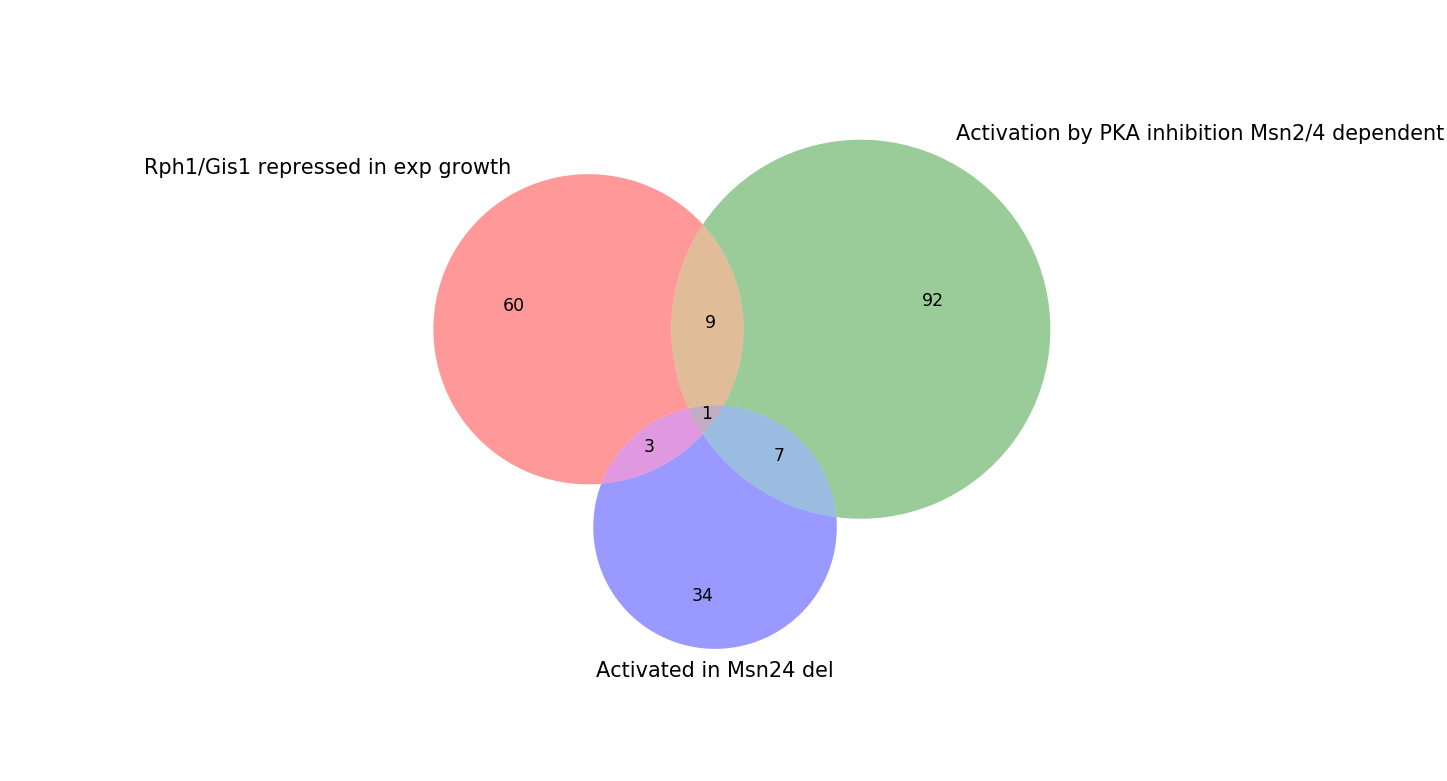

In [14]:
venn3([set(r1g1_rep_genes.index), set(m24_nmpp1_act_genes.index), set(m24_act_genes.index)], set_labels = ['Rph1/Gis1 repressed in exp growth', 'Activation by PKA inhibition Msn2/4 dependent', 'Activated in Msn24 del'])

In [8]:
io_library.SC_common_name_lookup(list(set(r1g1_rep_genes.index) & set(m24_act_genes.index)))

['GAD1', 'PNC1', 'YOL153C', 'CYC7']

In [61]:
io_library.SC_common_name_lookup(list(set(r1g1_rep_genes.index) & set(m24_nmpp1_act_genes.index)))

['HXT5',
 'GAD1',
 'YNL194C',
 'TFS1',
 'PGM2',
 'SIP18',
 'TRX3',
 'MOH1',
 'HSP26',
 'GRE1']

In [15]:
io_library.SC_common_name_lookup(list(set(m24_nmpp1_act_genes.index) & set(m24_act_genes.index)))

['EGO4', 'GAD1', 'GPH1', 'HSP12', 'STF2', 'GPX1', 'RTC3', 'SOL4']

In [69]:
io_library.SC_common_name_lookup(list(set(r1g1_rep_genes.index) - set(m24_nmpp1_act_genes.index)))

['MFA1',
 'YKL068W-A',
 'YJL163C',
 'SDS24',
 'YGR066C',
 'AMS1',
 'HEF3',
 'GPM2',
 'XBP1',
 'SAF1',
 'TPK1',
 'UBP11',
 'tD(GUC)I1',
 'YPC1',
 'PBI2',
 'DDR48',
 'YNL092W',
 'GSP2',
 'MRPS12',
 'UGA2',
 'DDR2',
 'SHC1',
 'ATG7',
 'YTP1',
 'YOL153C',
 'SIP4',
 'YCR025C',
 'YGP1',
 'YLR366W',
 'YLR149C',
 'UGX2',
 'YCL012C',
 'HVG1',
 'YKR011C',
 'GPP2',
 'HYR1',
 'STF1',
 'YHR140W',
 'COQ11',
 'SDP1',
 'CYC7',
 'SDH6',
 'SGA1',
 'FMP48',
 'YER053C-A',
 'ULA1',
 'ATG34',
 'YRO2',
 'SOD2',
 'ATG33',
 'YCR061W',
 'RMR1',
 'PNS1',
 'YJL070C',
 'YGR174W-A',
 'TES1',
 'YIL100C-A',
 'GLK1',
 'RNY1',
 'HXT4',
 'YIL055C',
 'PNC1',
 'YHR180W-A']

In [70]:
io_library.SC_common_name_lookup(list(set(m24_nmpp1_act_genes.index) - set(r1g1_rep_genes.index)))

['YKL151C',
 'POT1',
 'YER084W-A',
 'YKL091C',
 'GPH1',
 'UIP4',
 'GIP2',
 'YKL065W-A',
 'RTN2',
 'SHH3',
 'COX26',
 'SRX1',
 'YMR206W',
 'NQM1',
 'CTA1',
 'YDR048C',
 'PDR15',
 'STF2',
 'YCL048W-A',
 'YCL023C',
 'HO',
 'MPH3',
 'RRT12',
 'MSC1',
 'YMR090W',
 'tS(AGA)D2',
 'AGX1',
 'YBR116C',
 'CYB2',
 'FIT2',
 'NDE2',
 'ALD3',
 'TSA2',
 'SYM1',
 'GRX1',
 'YDR491C',
 'URA10',
 'SPS100',
 'YFL054C',
 'YJL045W',
 'YBR221W-A',
 'HSP31',
 'SSA4',
 'AIM19',
 'YAR010C',
 'YER068C-A',
 'AQY1',
 'PAI3',
 'VMR1',
 'SHH4',
 'TKL2',
 'GRE3',
 'EIS1',
 'YPR172W',
 'YDL199C',
 'YHR193C-A',
 'YOR186W',
 'YCL042W',
 'PIR3',
 'YPT53',
 'HSP12',
 'REC114',
 'YDR406W-A',
 'YDR193W',
 'SPG4',
 'TSL1',
 'YJR096W',
 'SSA3',
 'OM14',
 'PMA2',
 'GPX1',
 'RTC3',
 'YDL242W',
 'RIM4',
 'ACH1',
 'YPL136W',
 'PHM7',
 'FMP16',
 'DCS2',
 'ACS1',
 'TDA10',
 'EGO4',
 'HXK1',
 'YEL034C-A',
 'OM45',
 'YMR175W-A',
 'GND2',
 'IGD1',
 'YGR201C',
 'DGR1',
 'YNL195C',
 'CTT1',
 'SOL4',
 'DLD1',
 'GUT2',
 'GCY1',
 'YML099W-A

In [16]:
r1g1_m24int_merge.columns

Index(['baseMean_RGrep', 'log2FoldChange_RGrep', 'lfcSE_RGrep', 'stat_RGrep',
       'pvalue_RGrep', 'padj_RGrep', 'SC_common_name_RGrep',
       'baseMean_M24_act', 'log2FoldChange_M24_act', 'lfcSE_M24_act',
       'stat_M24_act', 'pvalue_M24_act', 'padj_M24_act',
       'SC_common_name_M24_act'],
      dtype='object')

In [22]:
#Plot LFC of RG activation v.s. M24 drug interaction

r1g1_m24int_merge = r1g1_deseq.merge(m24_nmpp1_int_deseq, how='inner',suffixes= ('_RGrep','_M24act'),left_index=True, right_index=True)


data = []

trace = pygo.Scatter(
            x = r1g1_m24int_merge['log2FoldChange_RGrep'], 
            y =  r1g1_m24int_merge['log2FoldChange_M24act'],
            text = r1g1_m24int_merge['SC_common_name_RGrep'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = 'Rph1/Gis1 repressed LFC vs Msn24_PKA activation LFC'
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        "range":[-20, 20],
        "title":'Rph1/Gis1 del v.s. WT LFC'
    },
    yaxis= {
        "range":[-10, 10],
        "title":'Msn24 del/PKA inhibition interaction term LFC'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='RNAseq2018_R1G1rep_v_M24PKAact')

In [23]:
r1g1_m24int_merge[r1g1_m24int_merge['SC_common_name_M24act']=='HSP12']

,baseMean_RGrep,log2FoldChange_RGrep,lfcSE_RGrep,stat_RGrep,pvalue_RGrep,padj_RGrep,SC_common_name_RGrep,baseMean_M24act,log2FoldChange_M24act,lfcSE_M24act,stat_M24act,pvalue_M24act,padj_M24act,SC_common_name_M24act
YFL014W,48.704855,-0.821724,0.575935,-1.426765,0.153648,0.99735,HSP12,4586.58369,-3.874665,1.27219,-3.045665,0.002322,0.031496,HSP12


## Promoter analysis of various groups

In [7]:
#Read in the SC promoter database.  
sc_promoters = pd.read_pickle(data_processing_dir + os.path.normpath("sc_promoters/sc_promoters.pkl"))

In [15]:
#Make promoter files for different sets

genesets = {'r1g1_rep': r1g1_rep_genes.index, 'm24_act': m24_act_genes.index, 'm24_nmpp1_act': m24_nmpp1_act_genes.index}

for name, geneset in genesets.items(): 
    target_promoter_fname = data_processing_dir + os.path.normpath('sc_promoters/promoter_sets/sc_20181101_' + name + '.fasta')
    io_library.write_promoter_file(sc_promoters, geneset,target_promoter_fname)

tD(GUC)I1 not in promoter data set.
tE(UUC)K not in promoter data set.
tT(AGU)O2 not in promoter data set.
tV(AAC)M3 not in promoter data set.
tS(AGA)D2 not in promoter data set.
